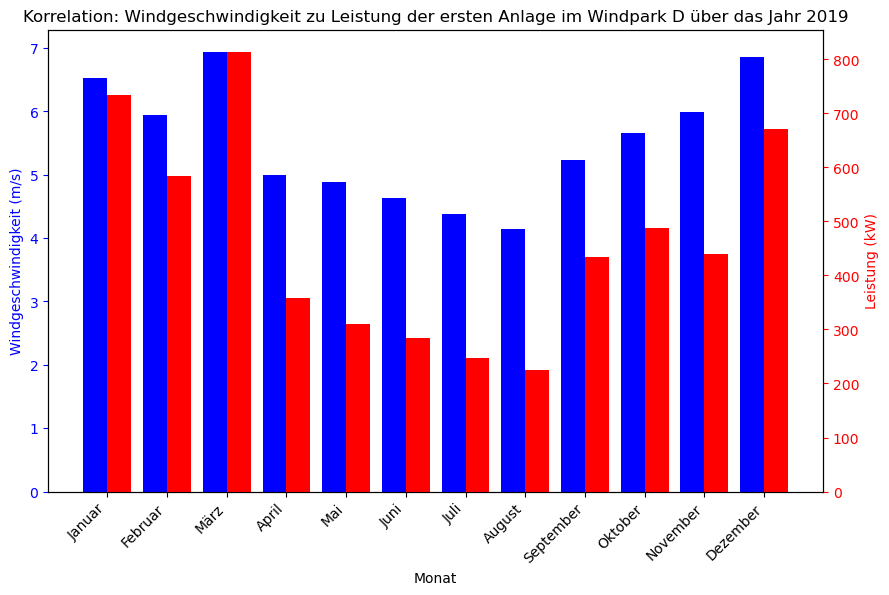

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from typing import List
import numpy as np

from utility import month_mapping

year = 2019
cwd=os.getcwd()
parent_directory=os.path.dirname(cwd)
feather_file = f'{parent_directory}/transformed_data/wind_farm_d/facility_1.feather'
df = pd.read_feather(feather_file)
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%f%z')
df2=df[df['DateTime'].dt.year == year]

#df2['Month'] = df2['DateTime'].dt.month # Produziert eine Warnung
df2 = df2.assign(Month=df2['DateTime'].dt.month) # Produziert keine Warnung

df3 = df2.groupby(['Month'])['Windgeschwindigkeit'].mean().reset_index()
df3["Leistung"] = df2.groupby(['Month'])['Leistung'].mean().reset_index()["Leistung"]

fig, ax1 = plt.subplots(figsize=(10, 6))

month_labels = df3['Month'].map(month_mapping)

ax1.bar(np.arange(len(month_labels)) - 0.2, df3['Windgeschwindigkeit'], color='b', label='Windgeschwindigkeit',width=0.4)
ax1.set_xlabel('Monat')
ax1.set_ylabel('Windgeschwindigkeit (m/s)', color='b')
ax1.set_xticks(np.arange(len(month_labels)))
ax1.set_xticklabels(month_labels, rotation=45,ha="right")
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.bar(np.arange(len(month_labels)) + 0.2, df3['Leistung'], color='r', label='Leistung',width=0.4)
ax2.set_ylabel('Leistung (kW)', color='r')
ax2.tick_params('y', colors='r')

plt.title(f'Korrelation: Windgeschwindigkeit zu Leistung der ersten Anlage im Windpark D über das Jahr {year}')

plt.show()